In [1]:
def read_logs(filename):
    with open("../Data/" + filename + ".log", "r") as file_obj:
        ret = file_obj.readlines()
    return ret

data = read_logs("ganache_log")

In [2]:
key_words = ["Transaction:", "Gas usage:"]
ganache_data = []
for index, line in enumerate(data):
    for word in key_words:
        if word in line:
            ganache_data.append(line)
del data

In [3]:
# for index, line in enumerate(ganache_data):
#     ganache_data[index] = line.split(':')[3].strip()

In [4]:
ganache_data

['[2021/12/27 17:04:32.106] -   Transaction: 0xe61a5cba55f66945e87ff80ff9be37960115dd13dbc1fff9f9df15d2b1b3e519\n',
 '[2021/12/27 17:04:32.106] -   Gas usage: 1533030\n',
 '[2021/12/27 17:04:32.664] -   Transaction: 0x15ad5bf7236a6b7f3a076509e3cc4239d346928381cd3e9ef9a24813a853199a\n',
 '[2021/12/27 17:04:32.671] -   Gas usage: 4236611\n',
 '[2021/12/27 17:04:33.349] -   Transaction: 0x7bb790345dae3c6be6f06e5e559768045db75155aaf51a8ed3875f4c33909d54\n',
 '[2021/12/27 17:04:33.350] -   Gas usage: 1912120\n',
 '[2021/12/27 17:04:33.794] -   Transaction: 0x815c90228a6095162d0a3c4636a2655792ce6c2348fc444620ee42713f29f9b4\n',
 '[2021/12/27 17:04:33.802] -   Gas usage: 1496854\n',
 '[2021/12/27 17:04:34.340] -   Transaction: 0xe35ddf4e168005d11f758b9c2a9171e437df2a90e8486d0a6e55cbdc80e1f2b9\n',
 '[2021/12/27 17:04:34.341] -   Gas usage: 1452467\n',
 '[2021/12/27 17:05:10.791] -   Transaction: 0xe3a10ccb3967d3cbf1ca88b29c953ce1a146fedf3baa9e7225403f541b6bf163\n',
 '[2021/12/27 17:05:10.793] -

In [5]:
transactions = []
gas_usage = []
for line in ganache_data:
    line = line[:-1]
    if "Transaction:" in line:
        transactions.append(line)
    else:
        gas_usage.append(line)

In [6]:
transactions

['[2021/12/27 17:04:32.106] -   Transaction: 0xe61a5cba55f66945e87ff80ff9be37960115dd13dbc1fff9f9df15d2b1b3e519',
 '[2021/12/27 17:04:32.664] -   Transaction: 0x15ad5bf7236a6b7f3a076509e3cc4239d346928381cd3e9ef9a24813a853199a',
 '[2021/12/27 17:04:33.349] -   Transaction: 0x7bb790345dae3c6be6f06e5e559768045db75155aaf51a8ed3875f4c33909d54',
 '[2021/12/27 17:04:33.794] -   Transaction: 0x815c90228a6095162d0a3c4636a2655792ce6c2348fc444620ee42713f29f9b4',
 '[2021/12/27 17:04:34.340] -   Transaction: 0xe35ddf4e168005d11f758b9c2a9171e437df2a90e8486d0a6e55cbdc80e1f2b9',
 '[2021/12/27 17:05:10.791] -   Transaction: 0xe3a10ccb3967d3cbf1ca88b29c953ce1a146fedf3baa9e7225403f541b6bf163',
 '[2021/12/27 17:05:11.333] -   Transaction: 0x4b111278c5272cb7fefd2664d82ab5a4e078b34b51bf3d20f3b1373603db1c2f',
 '[2021/12/27 17:05:11.803] -   Transaction: 0xdb8f2dd2ae8c20582f0611c9128fb4e870d8731bdd7d0f6aa61c3d0e7460e9ef',
 '[2021/12/27 17:05:11.852] -   Transaction: 0x63f0ab91623ec64d849f6a877084135d73a193349

In [7]:
def convert_milisec(line: str) -> int:
    time_stamp = line[15:24]
    t = time_stamp.split(':')
    for i in t.pop(1).split('.'):
        t.append(i)
    return int(t[0]) * 60 * 1000 + int(t[1]) * 1000 + int(t[2])
time_stamps = []
for line in transactions:
    time_stamps.append(convert_milisec(line))

In [8]:
time_stamps

[272106,
 272664,
 273349,
 273794,
 274340,
 310791,
 311333,
 311803,
 311852,
 361674,
 363247,
 363431,
 363649,
 363904,
 364084,
 365015,
 365309,
 365514,
 365741,
 368384,
 368556,
 368715,
 368890,
 368995,
 389565,
 389991,
 390415,
 390995,
 391340,
 394992,
 395304,
 395634,
 396228,
 396570,
 400295,
 400608,
 400947,
 401435,
 401782,
 405672,
 405975,
 406584,
 406874,
 407164,
 410772,
 411119,
 411770,
 412136,
 412495,
 415998,
 416306,
 416825,
 417192,
 417504,
 421257,
 421581,
 422214,
 422576,
 422905,
 426650,
 427015,
 427595,
 427907,
 428196,
 432168,
 432496,
 433264,
 433566,
 433854,
 437702,
 438060,
 438805,
 439137,
 439403,
 442979,
 443301,
 443878,
 444199,
 444544,
 448296,
 448660,
 449331,
 449645,
 449933,
 453556,
 453896,
 454386,
 454693,
 455017,
 458469,
 458803,
 459478,
 459775,
 460107,
 463726,
 464065,
 464688,
 465055,
 465399,
 469051,
 469410,
 469977,
 470327,
 470620,
 474267,
 474608,
 475115,
 475396,
 475651,
 480158,
 480604,
 

In [9]:
total_time = (time_stamps[-1] - time_stamps[0]) // 1000

In [10]:
total_transactions = len(transactions)

In [11]:
transactions_per_sec = total_time / total_transactions
num_transactions = []
count = 0
for _ in transactions:
    count += 1
    num_transactions.append(count)

In [12]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

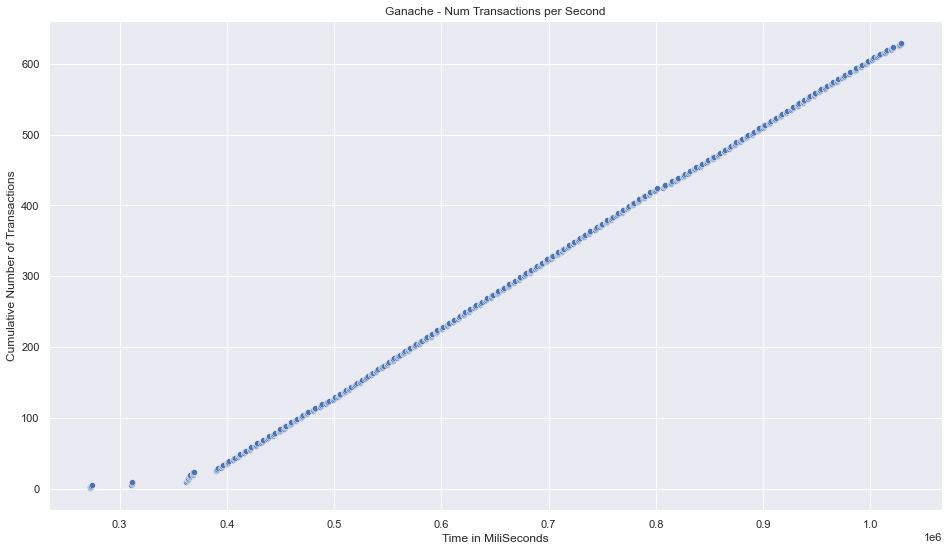

In [13]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (16, 9))
sns.scatterplot(y = num_transactions, x = time_stamps)
# plt.xticks()
# plt.yticks()
# ax.set_xticklabels()
plt.xlabel('Time in MiliSeconds')
plt.ylabel('Cumulative Number of Transactions')
plt.title('Ganache - Num Transactions per Second')
plt.savefig('../Graphs/Ganache-tx_per_sec.png')
plt.show()

In [14]:
block_time = []
for index, time in enumerate(time_stamps):
    if index == 0:
        block_time.append(0)
        continue
    block_time.append((time - time_stamps[index - 1]) / 1000)

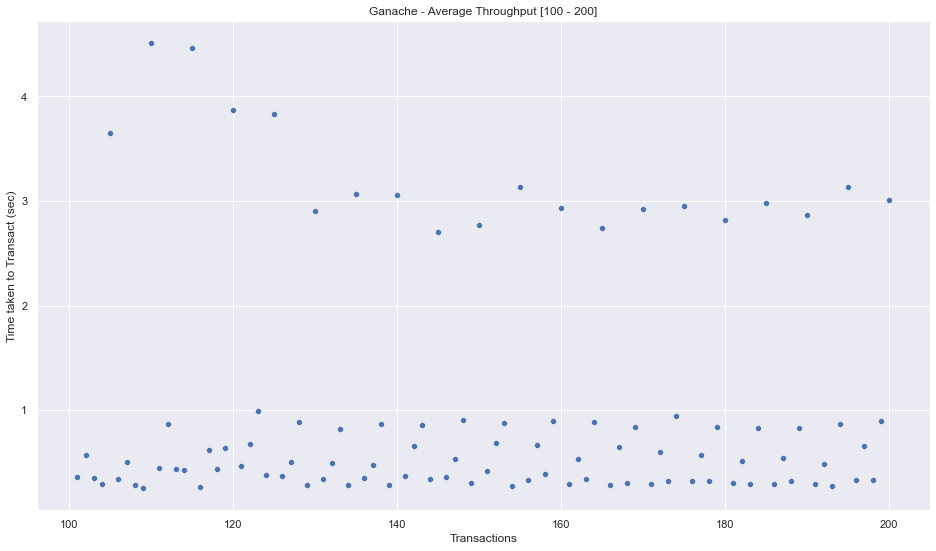

In [15]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (16, 9))
sns.scatterplot(y = block_time[100:200], x = num_transactions[100:200])
plt.xlabel('Transactions')
plt.ylabel('Time taken to Transact (sec)')
plt.title('Ganache - Average Throughput [100 - 200]')
plt.savefig('../Graphs/Ganache-Throughput.png')
plt.show()

In [16]:
for index in range(len(gas_usage)):
    gas_usage[index] = int(gas_usage[index].split(':')[3].strip())
time_stamps_sec = []
for time in time_stamps:
    time_stamps_sec.append(time / 1000)

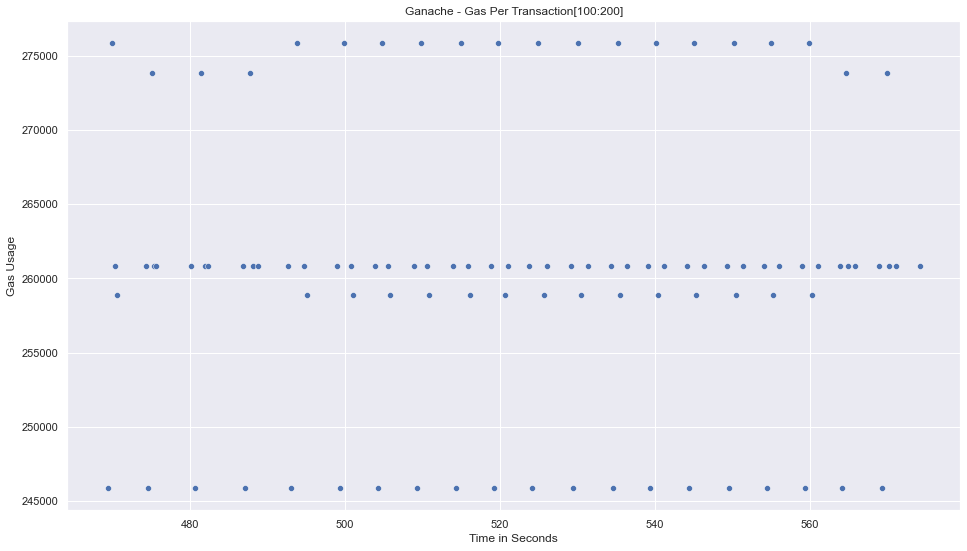

In [17]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (16, 9))
sns.scatterplot(y = gas_usage[100:200], x = time_stamps_sec[100:200])
# plt.xticks()
# plt.yticks()
# ax.set_xticklabels()
plt.xlabel('Time in Seconds')
plt.ylabel('Gas Usage')
plt.title('Ganache - Gas Per Transaction[100:200]')
plt.savefig('../Graphs/Ganache-gas_usage_per_transaction.png')
plt.show()

In [18]:
gas_usage

[1533030,
 4236611,
 1912120,
 1496854,
 1452467,
 43691,
 64534,
 64533,
 49534,
 391281,
 364941,
 368707,
 372536,
 375893,
 249936,
 219876,
 219876,
 219984,
 219744,
 207327,
 192171,
 192327,
 192303,
 192327,
 370144,
 323619,
 353624,
 338617,
 277411,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 275857,
 260842,
 258887,
 260857,
 245860,
 273887,
 260842,
 260857,
 260857,
 245860,
